In [842]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
)


## Data Preprocessing

In [843]:
# Read the data
df = pd.read_csv("Combined_News_DJIA_0.csv")


In [844]:
df.head()


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [845]:
# This is roughly a 80%/20% split by using data from 2008-08-08 to 2014-12-31 as the training Set, and data from 2015-01-02 to 2016-07-01 as the testing Set
train = df[df["Date"] < "20150101"]
y_train = train["Label"]

test = df[df["Date"] > "20141231"]
y_test = test["Label"]


In [846]:
df_train = train.iloc[:, 2:27]
# replace non-alphabetic characters with spaces
df_train.replace("[^a-zA-Z]", " ", regex=True, inplace=True)

# Convertng headlines to lower case
for i in df_train.columns:
    df_train[i] = df_train[i].str.lower()
df_train.head(1)


,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,b georgia downs two russian warplanes as cou...,b breaking musharraf to be impeached,b russia today columns of troops roll into so...,b russian tanks are moving towards the capital...,b afghan children raped with impunity u n ...,b russian tanks have entered south ossetia...,b breaking georgia invades south ossetia rus...,b the enemy combatent trials are nothing but...,b georgian troops retreat from s osettain cap...,b did the u s prep georgia for war with russia,...,b georgia invades south ossetia if russia ge...,b al qaeda faces islamist backlash,b condoleezza rice the us would not act to p...,b this is a busy day the european union has ...,b georgia will withdraw soldiers from ir...,b why the pentagon thinks attacking iran is a ...,b caucasus in crisis georgia invades south os...,b indian shoe manufactory and again in a se...,b visitors suffering from mental illnesses ban...,b no help for mexico s kidnapping surge


In [847]:
# Combine 25 headlines into a single paragraph for each row
x_train = []
for row in range(0, len(df_train.index)):
    x_train.append(" ".join(str(x) for x in df_train.iloc[row, 0:25]))


In [848]:
x_train[0]  # first row


'b georgia  downs two russian warplanes  as countries move to brink of war  b breaking  musharraf to be impeached   b russia today  columns of troops roll into south ossetia  footage from fighting  youtube   b russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire  b afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing  b     russian tanks have entered south ossetia whilst georgia shoots down two russian jets   b breaking  georgia invades south ossetia  russia warned it would intervene on so s side  b the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   b georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video   b did the u s  prep georgia for war with russia   b rice gives green

In [849]:
start_time = time.time()


In [850]:
## Create the BOW (i.e. word-count matrix) for the training set
vectorizer = CountVectorizer(
    ngram_range=(2, 2)
)  # combine the 2 words together and assign the value
x_train_vectorized = vectorizer.fit_transform(x_train)
encoded_text = x_train_vectorized.toarray()
encoded_df = pd.DataFrame(data=encoded_text, columns=vectorizer.get_feature_names_out())
encoded_df


,aa pakistan,aaa credit,aaa rating,aaa seal,aaa to,aaaw nice,aab in,aabo was,aadmi party,aafia disappeared,...,zurich communal,zurich cops,zurich hotel,zurich tram,zurich will,zuyevo rice,zwanziger has,zweimal hitler,zygi naval,zyklon the
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [851]:
model = MultinomialNB()
model.fit(x_train_vectorized, y_train)


MultinomialNB()

In [852]:
end_time = time.time() - start_time
print("Training time: {:.2f} s".format(end_time))


Training time: 2.04 s


In [853]:
## Perform the prediction on the test set
x_test = []
for row in range(0, len(test.index)):
    x_test.append(" ".join(str(x) for x in test.iloc[row, 2:27]))
x_test_vectorized = vectorizer.transform(x_test)
prediction = model.predict(x_test_vectorized)


In [854]:
prediction


array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [855]:
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

accuracy_score = accuracy_score(y_test, prediction)
print("Accuracy: %.4f" % accuracy_score)

classification_report = classification_report(y_test, prediction)
print(classification_report)

auc = roc_auc_score(y_test, prediction)
print("AUC: %.4f" % auc)


[[140  46]
 [ 12 180]]
Accuracy: 0.8466
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       186
           1       0.80      0.94      0.86       192

    accuracy                           0.85       378
   macro avg       0.86      0.85      0.84       378
weighted avg       0.86      0.85      0.85       378

AUC: 0.8451


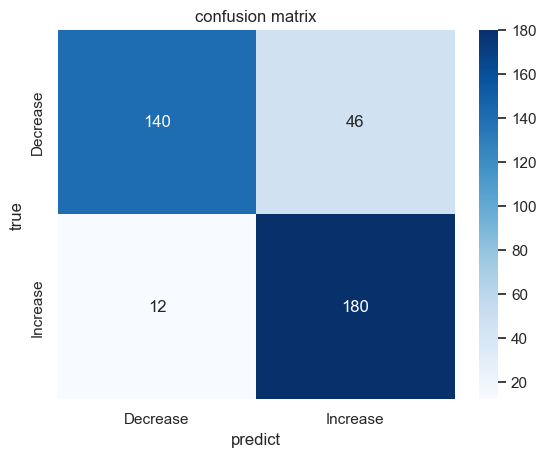

In [856]:
# Plot the confusion matrix heatmap
sns.set()
confusion_matrix_name = pd.DataFrame(
    confusion_matrix, index=["Decrease", "Increase"], columns=["Decrease", "Increase"]
)
f, ax = plt.subplots()
sns.heatmap(confusion_matrix_name, annot=True, fmt=".20g", cmap=plt.cm.Blues, ax=ax)

ax.set_title("confusion matrix")
ax.set_xlabel("predict")
ax.set_ylabel("true")
plt.savefig("confusion matrix.pdf")


## Generate Synthetic Data

In [857]:
# unqiue words in the training set
vocab = vectorizer.get_feature_names_out()
vocab


array(['aa pakistan', 'aaa credit', 'aaa rating', ..., 'zweimal hitler',
       'zygi naval', 'zyklon the'], dtype=object)

In [858]:
# generate the probability of features given a class
conditional_prob = np.exp(
    model.feature_log_prob_
)  # feature_log_prob_ corresponds to the empirical log probability of features given a class
conditional_prob


array([[2.58616454e-06, 3.87924681e-06, 2.58616454e-06, ...,
        1.29308227e-06, 2.58616454e-06, 1.29308227e-06],
       [1.20931414e-06, 2.41862827e-06, 3.62794241e-06, ...,
        2.41862827e-06, 1.20931414e-06, 2.41862827e-06]])

In [859]:
print(
    f"Since the real data ha a szie of {len(df)}, we choose to generate syntheic data with a size of {len(df)//2} under each label"
)


Since the real data ha a szie of 1989, we choose to generate syntheic data with a size of 994 under each label


In [860]:
# find the average number of words in each headline
list = []
for i in range(len(x_train)):
    list += x_train[i].split()
len(list) / len(x_train)
print(f"Average number of words in each headline is {len(list)/len(x_train)}")


Average number of words in each headline is 449.7128287707998


In [861]:
# generate sythetic data for negative news
negative_news = []
for i in range(994):
    sentence = random.choices(vocab, conditional_prob[0], k=random.randint(200, 300))
    negative_news.append(" ".join(sentence))
decrease_stock = pd.DataFrame({"Label": 0, "News Headlines": negative_news})


In [862]:
# generate sythetic data for positive news
positive_news = []
for i in range(994):
    sentence = random.choices(vocab, conditional_prob[1], k=random.randint(200, 300))
    positive_news.append(" ".join(sentence))
increase_stock = pd.DataFrame({"Label": 1, "News Headlines": positive_news})


In [863]:
synthetic_data = pd.concat([decrease_stock, increase_stock], axis=0).reset_index(
    drop=True
)
synthetic_data


,Label,News Headlines
0,0,in litterature tsunami as raised million milit...
1,0,nine dead hernndez fought country national mus...
2,0,it criticised student protestors fronts russia...
3,0,royalties and in her for ddos the presidential...
4,0,cbc pope hunt on was killed hastily built can ...
...,...,...
1983,1,stops me staff from abuse one to peace happen ...
1984,1,in further grows in officials supported fundin...
1985,1,who was one of fukushima no europeans test the...
1986,1,over irish at shooting becoming reality were t...


In [864]:
# export the synthetic data
synthetic_data.to_csv("synthetic_data.csv")
